# Wine Quality Prediction : **PyCaret**

. **Variáveis de Input (features)**:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

. **Variável de Output (baseado nos resultados)**:
1. **quality** (score between 0 and 10)

. **Módulos e Pacotes Necessários**:

!pip install pycaret==3.3.2 -q

. **Versão das Bibliotecas**\
Pandas version: 2.2.2\
NumPy version: 1.26.4\
PyCaret version: 3.3.2\
Matplotlib version: 3.7.5\
Seaborn version: 0.12.2

#### Importando as Bibliotecas

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Carregar o Dataset

In [36]:
file = 'winequality-red.csv'

data = pd.read_csv( file )

#### Entendimento do Dataset

In [37]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Visualização dos Dados

In [41]:
# Visualizar a distribuição de cada features através de histogramas
plt.figure(figsize=(12,8))

for i, col in enumerate(data[:-1]):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Visualizar a correlação entre as features utilizando heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="crest", fmt=".2f")
plt.title("Mapa de Correlações")
plt.show()

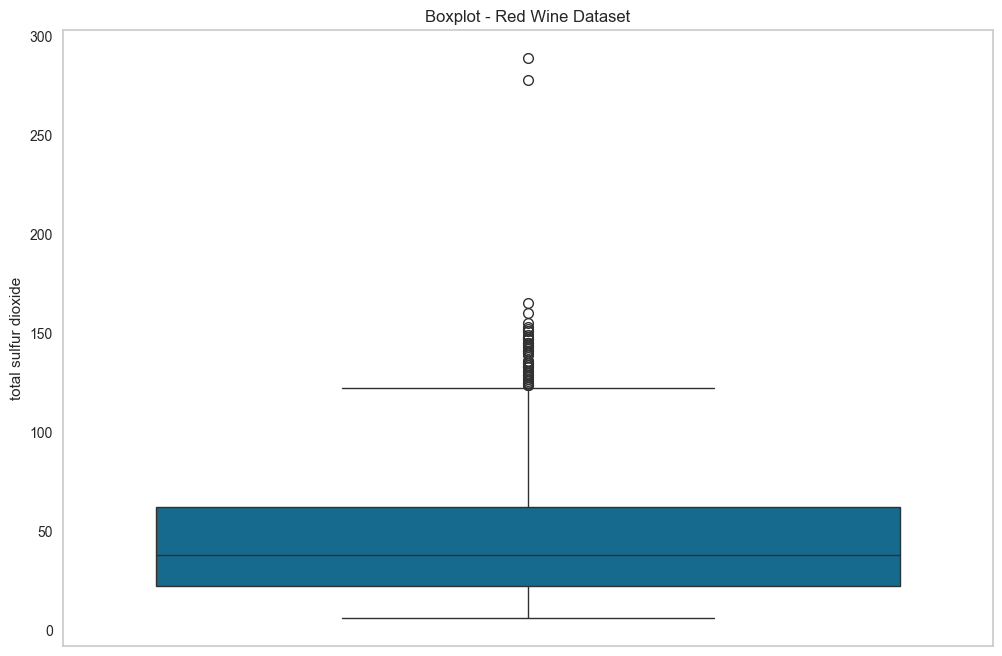

In [69]:
# Box-plot
plt.figure(figsize=(12,8))
sns.boxplot(data=data, y='total sulfur dioxide' )
#plt.xticks(rotation=45)
plt.title("Boxplot - Red Wine Dataset")
plt.grid(False)
plt.show()

In [ ]:
# Violin-plot
plt.figure(figsize=(12,8))
sns.violinplot(data=data)
plt.xticks(rotation=45)
plt.title("Violin plot - Red Wine Dataset")
plt.show()

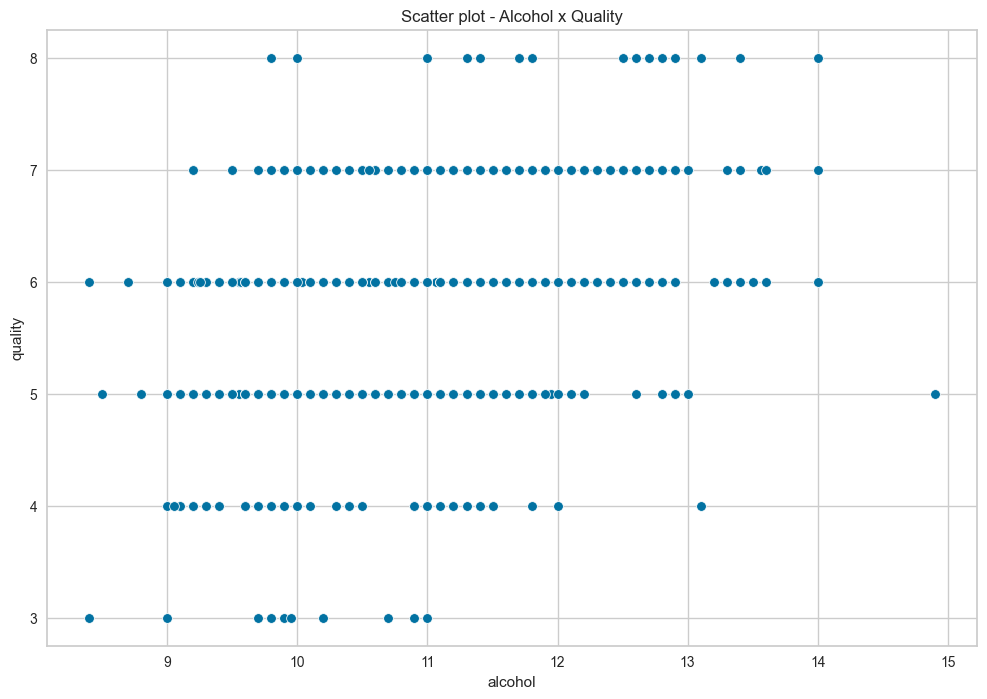

In [70]:
# Scatter plt
plt.figure(figsize=(12,8))
sns.scatterplot(x='alcohol', y='quality', data=data)
plt.title('Scatter plot - Alcohol x Quality')
plt.show()

#### Seleção do Modelo

In [43]:
from pycaret.classification import setup

In [45]:
modelo = setup(data, target='quality', session_id=123, verbose=True)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


### Comparação dos Modelos

In [49]:
from pycaret.classification import compare_models

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6702,0.5871,0.6702,0.6485,0.6494,0.4612,0.4667,0.1670
rf,Random Forest Classifier,0.6595,0.5761,0.6595,0.6323,0.6388,0.4444,0.4500,0.2020
lightgbm,Light Gradient Boosting Machine,0.6497,0.5725,0.6497,0.6277,0.6342,0.4365,0.4403,1.2770
gbc,Gradient Boosting Classifier,0.6354,0.0000,0.6354,0.6192,0.6237,0.4175,0.4197,0.9280
lr,Logistic Regression,0.6005,0.0000,0.6005,0.5746,0.5711,0.3359,0.3427,0.2490
lda,Linear Discriminant Analysis,0.5996,0.0000,0.5996,0.5814,0.5853,0.3572,0.3601,0.0240
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.4973,0.5318,0.2989,0.3103,0.0230
dt,Decision Tree Classifier,0.5872,0.4659,0.5872,0.5837,0.5821,0.3556,0.3572,0.0290
nb,Naive Bayes,0.5558,0.5033,0.5558,0.5628,0.5551,0.3141,0.3162,0.0230
qda,Quadratic Discriminant Analysis,0.5478,0.0000,0.5478,0.5467,0.5409,0.2872,0.2912,0.0230


### Melhor Modelo - Hiper-Parâmetros

In [13]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


### Performance Gráfica do Modelo

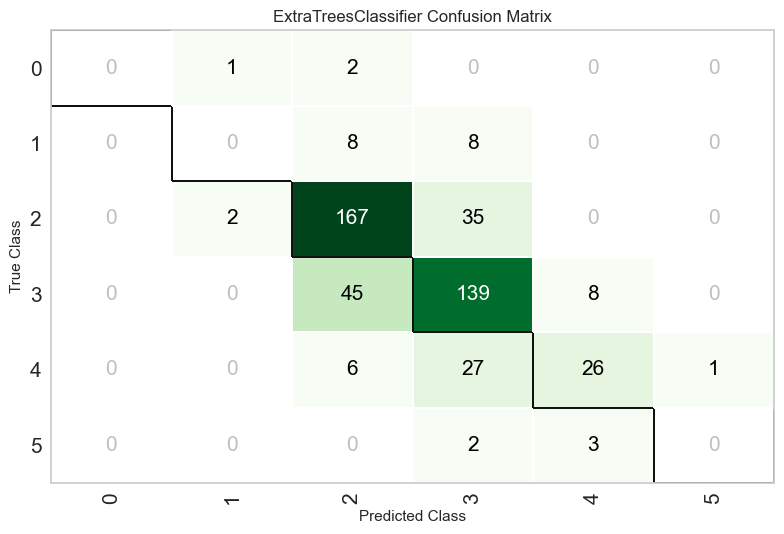

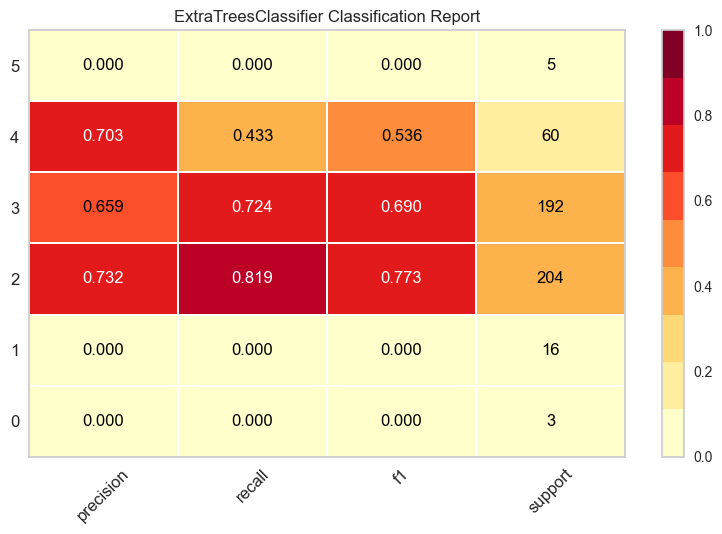

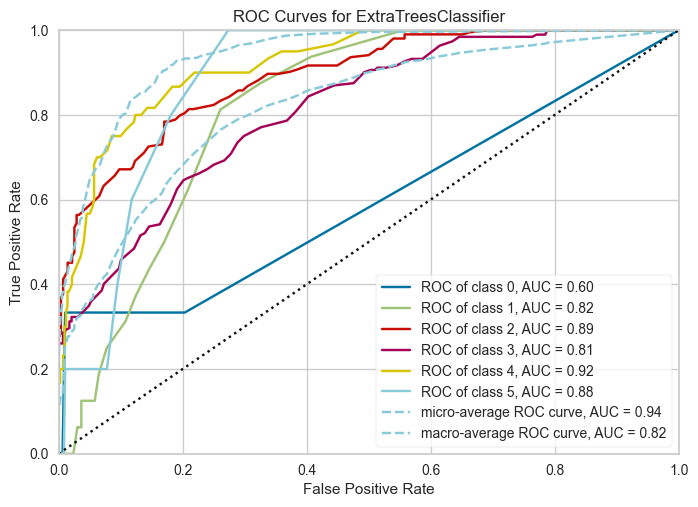

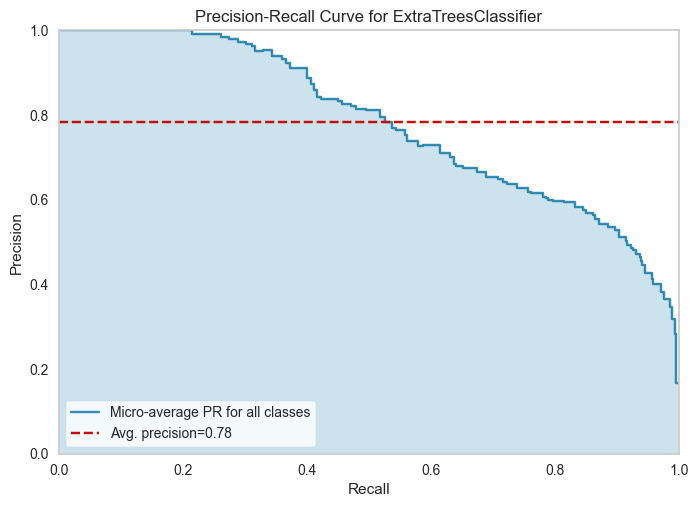

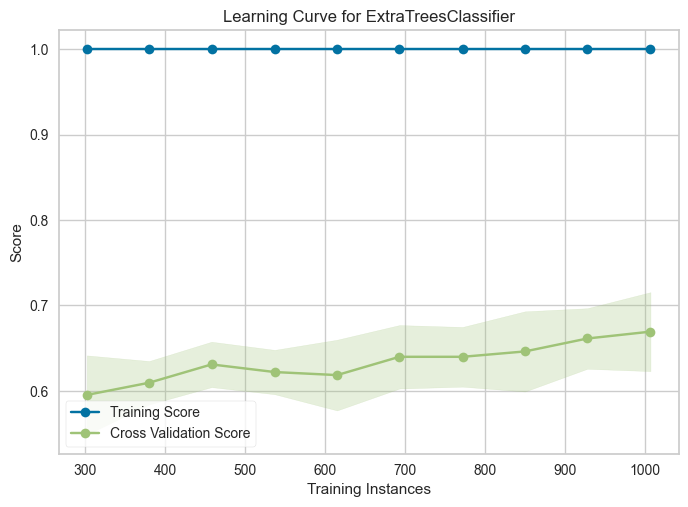

In [52]:
plot_model(best_model, plot='confusion_matrix')

plot_model(best_model, plot='class_report')

plot_model(best_model, plot="auc")

plot_model(best_model, plot='pr')

plot_model(best_model, plot='learning')

### Criar o Melhor Modelo

In [55]:
modelo = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7232,0.0000,0.7232,0.7028,0.7091,0.5497,0.5529
1,0.6786,0.0000,0.6786,0.6668,0.6586,0.4677,0.4733
2,0.6518,0.8484,0.6518,0.6312,0.6374,0.4377,0.4426
3,0.7054,0.8492,0.7054,0.6723,0.6765,0.5156,0.5228
4,0.7054,0.8360,0.7054,0.6798,0.6838,0.5169,0.5226
5,0.6786,0.8127,0.6786,0.6464,0.6619,0.4881,0.4892
6,0.6339,0.8441,0.6339,0.6026,0.6063,0.4046,0.4180
7,0.6964,0.8616,0.6964,0.6600,0.6717,0.5042,0.5087
8,0.5536,0.8191,0.5536,0.5746,0.5292,0.2554,0.2612


#### Assumindo que **'modelo'** é o melhor modelo criado utilizando **_create_model_**

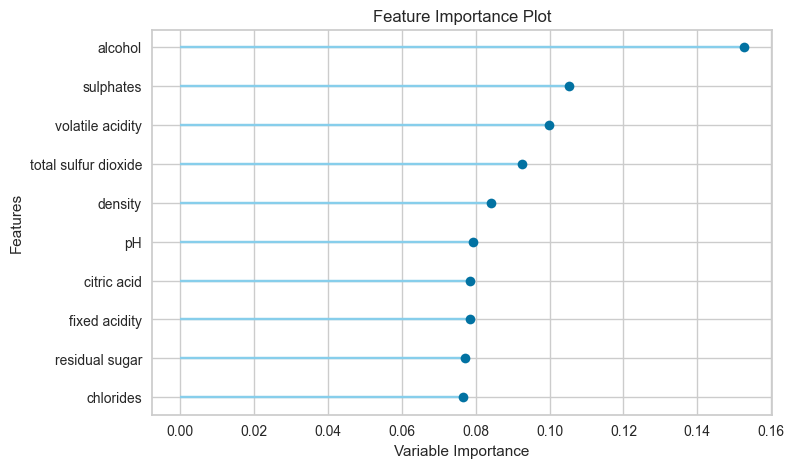

In [56]:
plot_model(best_model, plot='feature')

In [57]:
from pycaret.classification import tune_model

# Tunar o melhor modelo
modelo_tunado = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5893,0.0000,0.5893,0.5780,0.5646,0.3111,0.3175
1,0.5893,0.0000,0.5893,0.5324,0.5459,0.3054,0.3132
2,0.5714,0.7539,0.5714,0.5074,0.5327,0.2820,0.2871
3,0.6429,0.7866,0.6429,0.6466,0.5944,0.3972,0.4166
4,0.5893,0.7867,0.5893,0.5534,0.5463,0.3098,0.3197
5,0.6518,0.7835,0.6518,0.6334,0.6233,0.4221,0.4310
6,0.5804,0.7795,0.5804,0.5884,0.5479,0.2946,0.3029
7,0.6071,0.7826,0.6071,0.5805,0.5688,0.3410,0.3495
8,0.5625,0.7549,0.5625,0.5799,0.5270,0.2628,0.2703


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [58]:
from pycaret.classification import evaluate_model

evaluate_model(modelo_tunado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Finalizar o Modelo - Desenvolvimento

In [25]:
from pycaret.classification import finalize_model

modelo_final = finalize_model(modelo_tunado)

### Salvar o Modelo

In [59]:
from pycaret.classification import save_model

save_model(modelo_final, 'wine_quality_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

## Checando o Modelo - Salvo

In [60]:
from pycaret.classification import load_model, predict_model

# Carregar o modelo salvo
modelo = load_model('wine_quality_model')

# Ler novos dados ou utilizar o mesmo dataset
novos_dados = pd.read_csv( file )

# Utilizar o modelo para realizar predições
predicoes = predict_model(modelo, data = novos_dados)

# Apresentar as predições
print(predicoes)

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

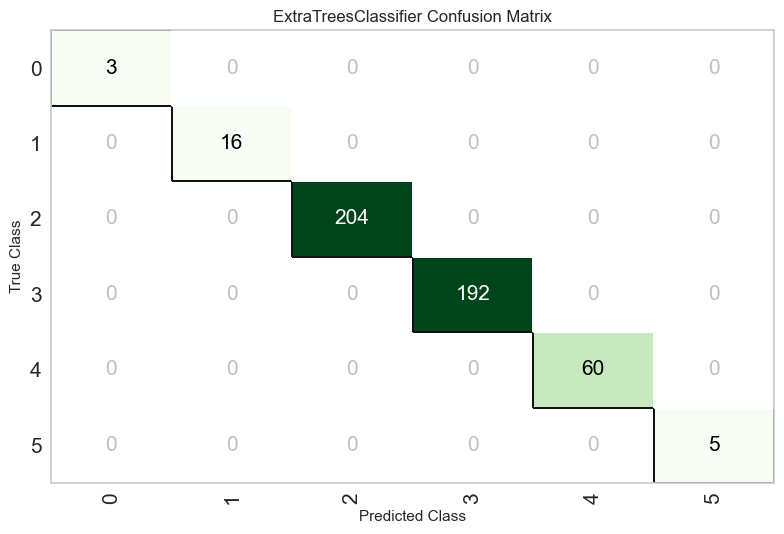

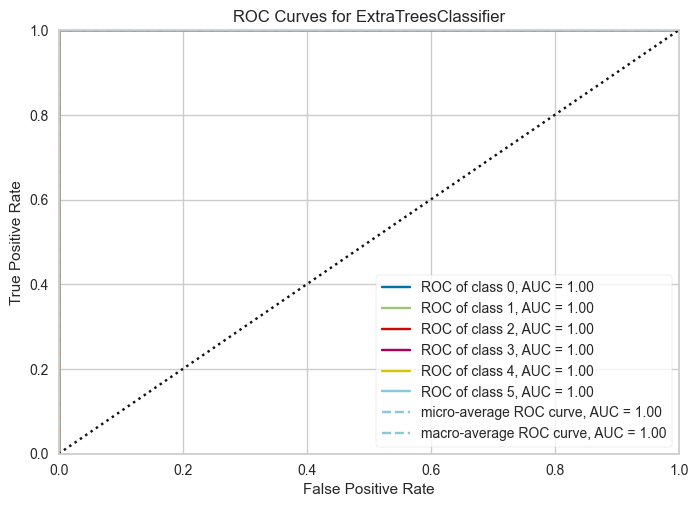

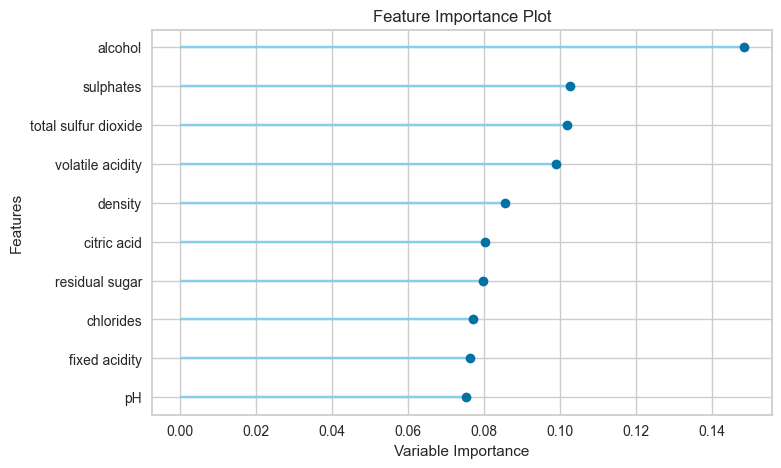

In [61]:
# Matriz de Confuzão
plot_model(modelo, plot='confusion_matrix')

# Curva ROC
plot_model(modelo, plot='auc')

# Feature Importante
plot_model(modelo, plot='feature')